# Examples how the Superstatistics functions can be applied to air pollution (q-exponential and local exponentials) or power grid frequency (q-Gaussians and local Gaussians)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kurtosis
from scipy.integrate import odeint
import statistics
from scipy.stats import lognorm
import math
import string
import sdeint
from joblib import Parallel, delayed 
import multiprocessing
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import pandas as pd
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy.stats import ttest_ind
from datetime import timedelta
import scipy.signal
import scipy.stats as st
from scipy.special import gamma, digamma
from scipy.optimize import minimize

import sys
import os
current_path = os.getcwd()
sys.path.insert(0, current_path)
#import all superstatistical functions from external notebook
import Superstatistics_Functions as sup

## 1 Import air pollution data and apply procedure using q-exponentials

In [2]:
#Import reference data
file='ColSirJCNO10.csv';
dataBase = pd.read_csv(file)
#select only the pollution values and drop any NaN values
sampleData=dataBase['Value'].dropna()
#some we pre-set for convenience
timeUnitName='d'
hour=4
day=24*hour
timeUnit=day
targetKurtosis=9
kurtosisTolerance=0.1
initialTimeGuess=6*day
initalGuessIncrement=1*day

In [3]:
data=np.array(sampleData.tolist())
#there are two functions availabel to determine the long time scale:
#We can employ the Nelder-Mead algorithm
print(sup.determineLongTimeScale(data,initialTimeGuess,kurtosisTolerance, targetKurtosis,method='Nelder-Mead'))
#Alternatively, we can use a self-implemented function, essentially a "manual Newton", assuming local linear behavior, the default method name is 'Manual Newton'
print(sup.determineLongTimeScale(data,initialTimeGuess,kurtosisTolerance, targetKurtosis,initalGuessIncrement=initalGuessIncrement,method='Manual Newton'))
#interesttingly, the "Manual newton" seems to be very fast, even if the guess is shifted away and a high accuracy is requested
print(sup.determineLongTimeScale(data,initialTimeGuess-200,0.005, targetKurtosis,initalGuessIncrement=initalGuessIncrement,method='Manual Newton'))

(618.3000000000001, 'Converged to kurtosis=9.002092747836382', 'Iterations needed=23')
(618, 'Converged to kurtosis=8.997907252163618', 'Iterations needed=1')
(618, 'Converged to kurtosis=8.997907252163618', 'Iterations needed=2')


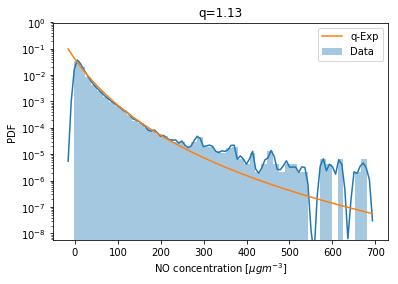

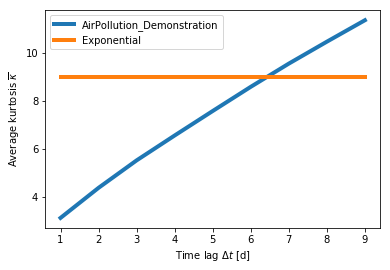

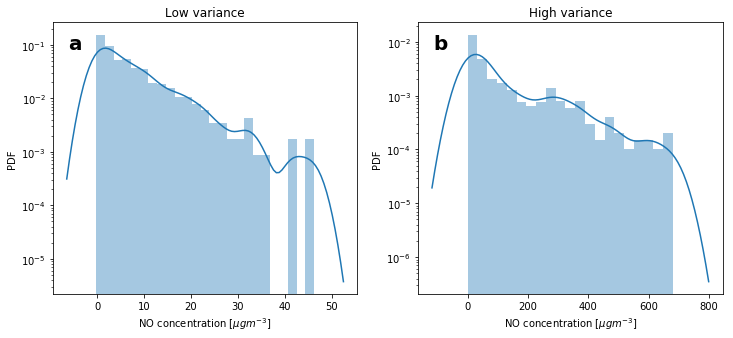

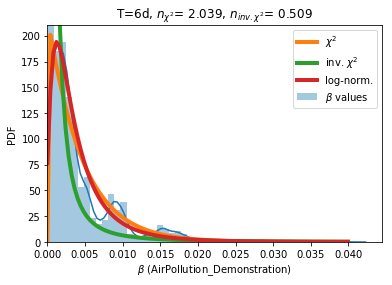

In [10]:
#run all the basic functions
data=np.array(sampleData.tolist())
xlabel='NO concentration [$\mu g m^{-3}$]'
exportName='AirPollution_Demonstration'
#histogram of the data with fit
sup.plot_fluctuation_histo(data,targetKurtosis,xlabel,exportName=exportName,export=True)
#long time scale plot
sup.plotLongTimeScale(data,1,10,1,targetKurtosis,xlabel, timeUnit,timeUnitName,exportName=exportName,export=True)
#determine long time scale systematically
longTimeScale_results=sup.determineLongTimeScale(data,initialTimeGuess,kurtosisTolerance, targetKurtosis,initalGuessIncrement=initalGuessIncrement)
#plot extreme snapshots and beta distribution if long time scale was determined correctly
if longTimeScale_results!='No convergence':
    longTimeScale=int(longTimeScale_results[0])
    sup.plotExtremeSnapshots(data,longTimeScale,xlabel,exportName=exportName,export=True)
    sup.fit_and_plot_betaDist(data,longTimeScale,xlabel,timeUnit,timeUnitName,exportName=exportName,export=True)

## 2 Import power grid frequency data and apply procedure using q-Gaussians

In [5]:
freqdata = pd.read_csv('50Hertz2015_Sample.txt', sep=" ", header=None)
freqdata.columns = ["f"]
freqdata=freqdata['f']

C:\Users\Benjamin\Desktop\PhD\Python Power Grid\Superstatistics_Functions.py:35: RuntimeWarning: invalid value encountered in double_scalars
  constant=np.sqrt(np.pi)*gamma((3-q)/(2*(q-1)))/(np.sqrt(q-1)*gamma(1/(q-1)))


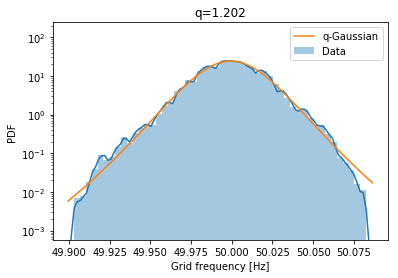

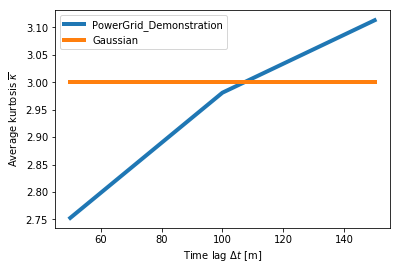

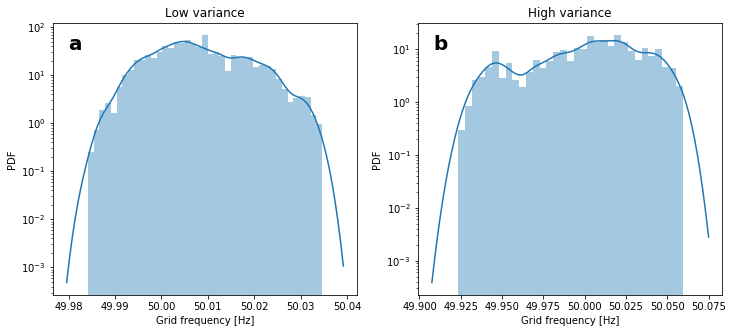

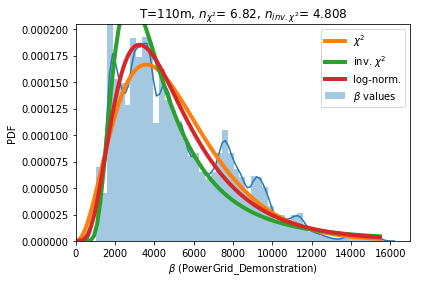

In [6]:
#run all the basic functions
data=freqdata
#some we pre-set for convinience
timeUnitName='m'
minute=60
timeUnit=minute
targetKurtosis=3
kurtosisTolerance=0.1
initialTimeGuess=100*minute
initalGuessIncrement=10*minute
xlabel='Grid frequency [Hz]'
exportName='PowerGrid_Demonstration'
#histogram of the data with fit
sup.plot_fluctuation_histo(data,targetKurtosis,xlabel,exportName=exportName,export=True)
#long time scale plot
sup.plotLongTimeScale(data,50,200,50,targetKurtosis,xlabel, timeUnit,timeUnitName,exportName=exportName,export=True)
#determine long time scale systematically
longTimeScale_results=sup.determineLongTimeScale(data,initialTimeGuess,kurtosisTolerance, targetKurtosis,initalGuessIncrement=initalGuessIncrement)
#plot extreme snapshots and beta distribution if long time scale was determined correctly
if longTimeScale_results!='No convergence':
    longTimeScale=int(longTimeScale_results[0])
    sup.plotExtremeSnapshots(data,longTimeScale,xlabel,exportName=exportName,export=True)
    sup.fit_and_plot_betaDist(data,longTimeScale,xlabel,timeUnit,timeUnitName,exportName=exportName,export=True)

Data sources:
The air pollution data was retrieved from https://www.londonair.org.uk/london/asp/datadownload.asp
The frequency data was taken from 50 Hertz (no longer available). Other, openly accessable data is available here: https://lrydin.github.io/Power-Grid-Frequency/